## Football Transfer Market Analysis

By : Fajri Kornel

Data source:
https://www.kaggle.com/vardan95ghazaryan/top-250-football-transfers-from-2000-to-2018?select=top250-00-19.csv

The data file contains information about the top 250 most expensive transfers for each football season, starting from season 2000-2001 up to season 2018-2019. But, according to the source, data for the 2018-2019 season is incomplete.

In [1]:
#mengimport pandas dan matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import dataframe
df = pd.read_csv("top250-00-19.csv")
incomplete_season = '2018-2019'
incomplete_season_index = df[df["Season"] == incomplete_season].index
df = df.drop(index = incomplete_season_index)

## Transfer Fee Trend Analysis

As time goes on, the football transfer market in Europe is assumed to have an increasing trend, i.e. the fee used to transfer players increases from season to season.

Is that assumption correct? From the data gained, visualizations could be created to prove those assumptions right or wrong.

In [3]:
#ambil kolom yang penting saja, yaitu season dan transfer fee
df_season_fee = df[["Season","Transfer_fee"]]
df_fee_by_season = df_season_fee.groupby("Season")

#array jenis season, untuk keperluan umum
season_array = df_season_fee["Season"].unique()

#akan digunakan parameter mean dan standar deviasi untuk menjelaskan
#tren transfer fee dari season ke season. berikut mean dan transfer feenya
df_fee_by_season_mean = df_fee_by_season.mean()
df_fee_by_season_std = df_fee_by_season.std()

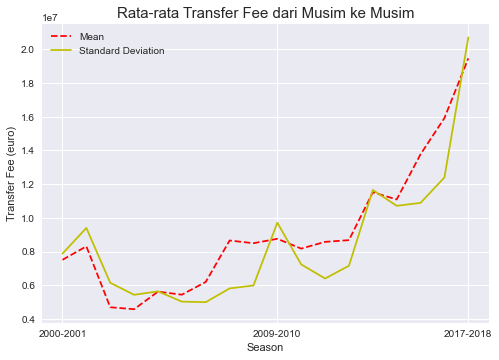

In [4]:
#plot mean dan standar deviasi transfer fee dari season ke season secara
#bersamaan dalam satu grafik

#style yang digunakan
plt.style.use('seaborn')

#plot grafik
plt.title('Rata-rata Transfer Fee dari Musim ke Musim', fontdict = {'fontsize' : 15})
plt.plot(df_fee_by_season_mean,'--r',label = "Mean")
plt.plot(df_fee_by_season_std,'-y', label = "Standard Deviation")
plt.xlabel('Season')
plt.ylabel('Transfer Fee (euro)')
plt.xticks(ticks=[season_array[0],season_array[int(len(season_array)/2)],season_array[-1]])
plt.legend()
plt.show()

The above image is a graph of the average transfer fee for each season.

From the above graph, it is seen that the transfer fee does show an increasing trend. Also, this phenomenon is accompanied by a high and increasing standard deviation, which means that the transfer market is becoming more and more unequal.

But, on the 2017-2018 season, an event which saw the transfer fee record broken happened. Neymar went to PSG. That incident also funded the transfers of Coutinho and Dembele to FC Barcelona, which in turn, increases the mean and standard deviation even more that season.

What happens when we look at the transfer market trend while overlooking the top 25 most expensive transfers each season? That way, maybe the transfer market trend could be seen clearer without anomalies such as the Neymar case.

In [5]:
#Membuat DataFrame yang membuang 25 transfer termahal setiap musim
df_season_fee_top25dropped = pd.DataFrame([])
for season in season_array:
    season_now = df_season_fee[df_season_fee["Season"] == season]
    top25_fee_index = season_now.nlargest(25,"Transfer_fee").index
    season_now = season_now.drop(index = top25_fee_index)
    df_season_fee_top25dropped = pd.concat([df_season_fee_top25dropped,season_now])

In [6]:
#kalkulasi statistik setiap musim
df_fee_by_season_top25dropped = df_season_fee_top25dropped.groupby("Season")
df_fee_by_season_top25dropped_mean = df_fee_by_season_top25dropped.mean()
df_fee_by_season_top25dropped_std = df_fee_by_season_top25dropped.std()

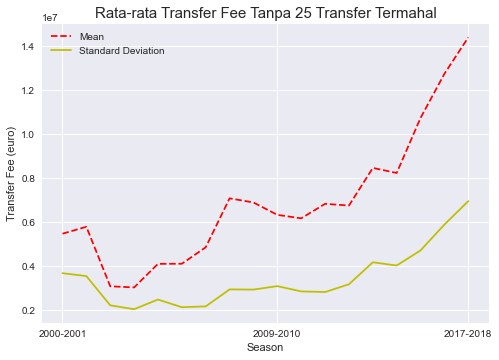

In [7]:
#Plot grafik
plt.title('Rata-rata Transfer Fee Tanpa 25 Transfer Termahal', fontdict = {'fontsize' : 15})
plt.plot(df_fee_by_season_top25dropped_mean,'--r',label = "Mean")
plt.plot(df_fee_by_season_top25dropped_std,'-y', label = "Standard Deviation")
plt.xlabel('Season')
plt.ylabel('Transfer Fee (euro)')
plt.xticks(ticks=[season_array[0],season_array[int(len(season_array)/2)],season_array[-1]])
plt.legend()
plt.show()

The above image is a graph of the average transfer fee for every transferred player each season while overlooking the 25 most expensive transfers.

From the above graph, it could be seen that, regardless of expensive transfer anomalies, it is true that the transfer market trend is increasing, i.e. the average transfer fee is increasing.

But, if the top 25 most expensive transfers of each season is overlooked, it is seen that the standard deviation does not increase as much as before. It means that the transfer market is more equal at the lower levels. But still, the standard deviation increases regardless.

# League Analysis on Transfer Market

There is an assumption that one football league is better than the other. There's even a term for bad leagues, that is 'Farmers' League'.

This time, we will analyze the comparison of top 5 leagues in Europe from the aspect of the money expended for transferring players each season. Will this prove the aforementioned assumptions correct?

In [8]:
#ambil kolom yang penting saja, yaitu season dan transfer fee
df_league = df[["League_to","Season","Transfer_fee"]]

#dataframe setiap liga top 5 Eropa
df_laliga = df_league[df["League_to"] == "LaLiga"]
df_epl = df_league[df["League_to"] == "Premier League"]
df_serieA = df_league[df["League_to"] == "Serie A"]
df_ligue1 = df_league[df["League_to"] == "Ligue 1"]
df_bundesliga = df_league[df["League_to"] == "1.Bundesliga"]

#list liga-liga untuk keperluan looping
list_league = [df_laliga,df_epl,df_serieA,df_ligue1,df_bundesliga]
list_league_name = ["La Liga", "Premier League", "Serie A", "Ligue 1", "Bundesliga"]
list_league_sum = [pd.DataFrame([]),pd.DataFrame([]),pd.DataFrame([]),pd.DataFrame([]),pd.DataFrame([])]

#looping untuk menghasilkan total biaya transfer yang dikeluarkan setiap musim
for i in range(len(list_league)):
    for j in range(len(season_array)):
        season_now = list_league[i][list_league[i]["Season"] == season_array[j]]
        season_now_trf = season_now["Transfer_fee"]
        season_trf_sum = season_now_trf.sum()
        list_league_sum[i] = pd.concat([list_league_sum[i],pd.DataFrame({"Season":[season_array[j]],"Transfer_sum":[season_trf_sum]},index = [j])])

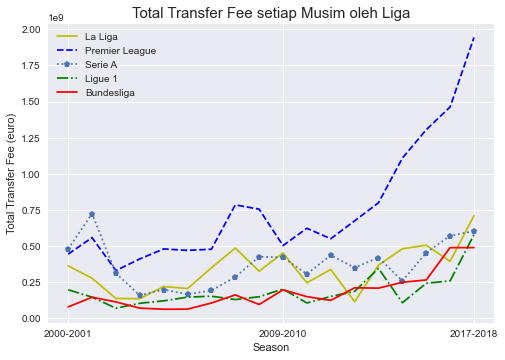

In [9]:
#Plot grafik
plt.title('Total Transfer Fee setiap Musim oleh Liga', fontdict = {'fontsize' : 15})
legend_styles = ['-y','--b',':p','-.g','-r']
for i in range(len(list_league_sum)):
    plt.plot(season_array,list_league_sum[i]["Transfer_sum"],legend_styles[i],label = list_league_name[i])
plt.xlabel('Season')
plt.ylabel('Total Transfer Fee (euro)')
plt.xticks(ticks=[season_array[0],season_array[int(len(season_array)/2)],season_array[-1]])
plt.legend()
plt.show()

The above image is a graph of the total transfer fee expended by each top 5 league in Europe each season.

From the above graph, it could be seen that there is one league which expends more money for transfers each season, i.e. the Premier League.

The case is clear for Premier League. But, to compare the other four leagues, the above graph is not suitable due to the messy lines.

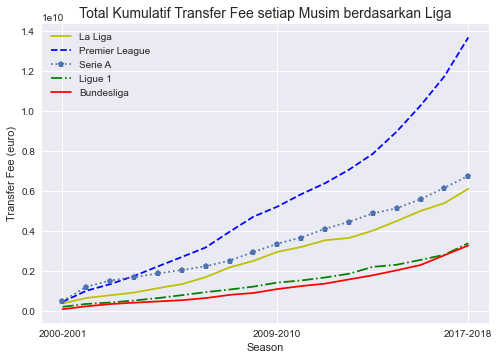

In [10]:
#Plot grafik
plt.title('Total Kumulatif Transfer Fee setiap Musim berdasarkan Liga', fontdict = {'fontsize' : 14})
legend_styles = ['-y','--b',':p','-.g','-r']
for i in range(len(list_league_sum)):
    plt.plot(season_array,list_league_sum[i]["Transfer_sum"].cumsum(),legend_styles[i],label = list_league_name[i])
plt.xlabel('Season')
plt.ylabel('Transfer Fee (euro)')
plt.xticks(ticks=[season_array[0],season_array[int(len(season_array)/2)],season_array[-1]])
plt.legend()
plt.show()

The above image is a graph of the cumulative total transfer fee expended by each top 5 leagues in Europe from season to season.

From this graph, like the graph from before, it is clear that Premier League leads in terms of transfer fees. It is also seen that La Liga and Serie A has a similar statistic. Bundesliga and Ligue 1 also has a similar statistic.

Is the above graph in accordance with the assumptions that the bottom two leagues, i.e. Bundesliga and Ligue 1, are 'Farmers' Leagues'? If we're talking about the transfer market side, those assumptions may be correct. But if we're talking about the level of football played, I guess it's harder to prove just by using transfer market data.